# Ejemplo de convet para clasificación de perros y gatos

El dataset esta disponible en: www.kaggle.com/c/dogs-vs-cats/data

In [1]:
import os, shutil

In [5]:
os.getcwd()

'/mnt/c/Users/smena/deep_learning_keras'

In [30]:
path = 'data/cats_and_dogs/'

In [31]:
print(path + 'con_etiqueta')

data/cats_and_dogs/con_etiqueta


## Data cats

In [35]:
# train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(path + 'con_etiqueta', fname)
    dst = os.path.join(path + 'train_cats_dir', fname)
    shutil.copyfile(src, dst)

In [36]:
# validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(path + 'con_etiqueta', fname)
    dst = os.path.join(path + 'validation_cats_dir', fname)
    shutil.copyfile(src, dst)

In [37]:
# test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(path + 'con_etiqueta', fname)
    dst = os.path.join(path + 'test_cats_dir', fname)
    shutil.copyfile(src, dst)

## Data dogs

In [38]:
# train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(path + 'con_etiqueta', fname)
    dst = os.path.join(path + 'train_dogs_dir', fname)
    shutil.copyfile(src, dst)

In [39]:
# validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(path + 'con_etiqueta', fname)
    dst = os.path.join(path + 'validation_dogs_dir', fname)
    shutil.copyfile(src, dst)

In [40]:
# test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(path + 'con_etiqueta', fname)
    dst = os.path.join(path + 'test_dogs_dir', fname)
    shutil.copyfile(src, dst)

## Creacion de instancia de una convets

In [49]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(521, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [52]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [54]:
# Utilizar ImageDataGenerator para leer imagenes del directorio
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [56]:
train_generator = train_datagen.flow_from_directory(
    path + 'train_dir',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [58]:
# Produce:
# lotes de imagenes RGB de 150 x 150 con forma: (20, 150 150, 3)
# etiquetas binarias con forma: (20,)
validation_generator = test_datagen.flow_from_directory(
    path + 'validation_dir',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
) 

Found 1000 images belonging to 2 classes.


In [61]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('data batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
data batch shape:  (20,)


In [63]:
# Ajuste del modelo utilizando un generador por lotes
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 89s 890ms/step - loss: 0.6888 - accuracy: 0.5370 - val_loss: 0.6797 - val_accuracy: 0.5330
Epoch 2/30
100/100 [==============================] - 86s 857ms/step - loss: 0.6631 - accuracy: 0.5985 - val_loss: 0.6525 - val_accuracy: 0.6030
Epoch 3/30
100/100 [==============================] - 85s 853ms/step - loss: 0.6328 - accuracy: 0.6430 - val_loss: 0.6248 - val_accuracy: 0.6560
Epoch 4/30
100/100 [==============================] - 89s 886ms/step - loss: 0.5877 - accuracy: 0.6930 - val_loss: 0.5998 - val_accuracy: 0.6750
Epoch 5/30
100/100 [==============================] - 89s 889ms/step - loss: 0.5507 - accuracy: 0.7230 - val_loss: 0.5866 - val_accuracy: 0.6930
Epoch 6/30
100/100 [==============================] - 89s 889ms/step - loss: 0.5193 - accuracy: 0.7460 - val_loss: 0.5757 - val_accuracy: 0.6980
Epoch 7/30
100/100 [==============================] - 88s 877ms/step - loss: 0.4878 - accuracy: 0.7565 - val_loss: 0.6045 - val_ac

In [67]:
# Guardar el modelo
model.save('models/cats_and_dogs_small_1.keras')

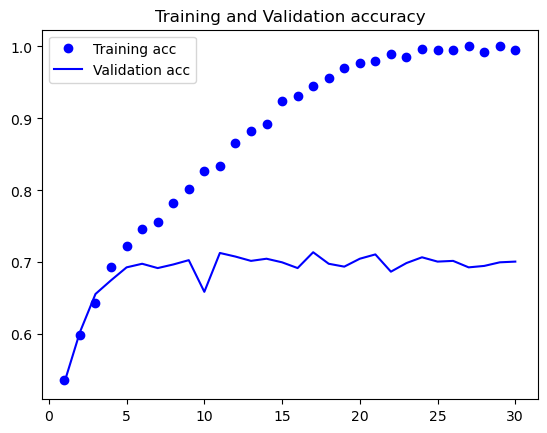

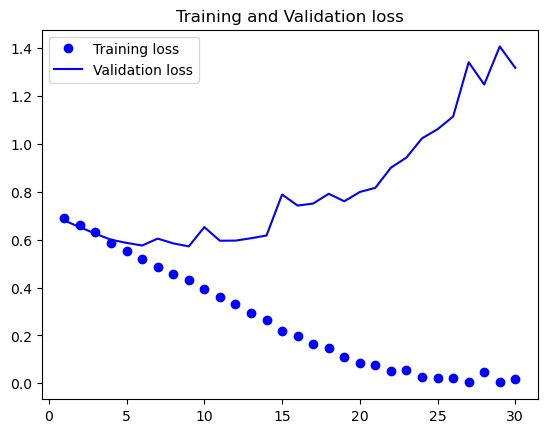

In [69]:
# Plot de curvas de perdida y exactitud durante el entrenamiento
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()